Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

**Do Not Run Two Cells Below**

In [ ]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [ ]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
print (enrollments[0])
print (daily_engagement[0])
print (project_submissions[0])

**Run The Cell Below**

In [1]:
#Alternative way with function
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print (enrollments[0])
print (daily_engagement[0])
print (project_submissions[0]) 

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [2]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data

In [5]:
#####################################
#                 3                 #
#####################################

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record.pop('acct')
print (daily_engagement[0]['account_key'])

0


**Do not Run The Cell Below**

In [ ]:
#Alternative way

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
print (daily_engagement[0]['account_key'])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [7]:
enrollment_num_rows = len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
enrollment_num_unique_students = len(unique_enrolled_students)
print (enrollment_num_rows)
print (enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
engagement_num_unique_students = len(unique_engagement_students)
print (engagement_num_rows)
print (engagement_num_unique_students)

submission_num_rows = len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
submission_num_unique_students = len(unique_project_submitters)
print (submission_num_rows)
print (submission_num_unique_students)

1640
1302
136240
1237
3642
743


**Do not Run the Two Cells Below**

These cells represent an alternative way to get data before the dictionary key 'acct' was changed to 'account_key' in daily_engagement

In [ ]:
# Alternative way presented that get same results

enrollment_num_rows = len(enrollments)
unique_enrolled_students = set()
for enrollment in enrollments:
     unique_enrolled_students.add(enrollment['account_key'])
enrollment_num_unique_students = len(unique_enrolled_students)
print (enrollment_num_rows)
print (enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)
unique_engagement_students = set()
for engagement_record in daily_engagement:
     unique_engagement_students.add(engagement_record['acct'])
engagement_num_unique_students = len(unique_engagement_students)
print (engagement_num_rows)
print (engagement_num_unique_students)

submission_num_rows = len(project_submissions)
unique_project_submitters = set()
for submission in project_submissions:
     unique_project_submitters.add(submission['account_key'])
submission_num_unique_students = len(unique_project_submitters)
print (submission_num_rows)
print (submission_num_unique_students)

In [ ]:
#####################################
#                 2                 #
#####################################

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(set([x['account_key'] for x in enrollments]))
print (enrollment_num_rows)
print (enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(set([x['acct'] for x in daily_engagement]))
print (engagement_num_rows)
print (engagement_num_unique_students)

submission_num_rows = len(project_submissions)
submission_num_unique_students = len(set([x['account_key'] for x in project_submissions]))
print (submission_num_rows)
print (submission_num_unique_students)

## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

enrolled_student_not_in_engagement = []
for enrolled_student in unique_enrolled_students:
    if enrolled_student not in unique_engagement_students:
        enrolled_student_not_in_engagement.append(enrolled_student)
        
enrolled_student_not_in_engagement_data = []
for enrolled_student in enrollments:
    if enrolled_student['account_key'] in enrolled_student_not_in_engagement:
        enrolled_student_not_in_engagement_data.append(enrolled_student)

print (enrolled_student_not_in_engagement_data[0])

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [ ]:
# Alternative way presented that get same results
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
surprising_students = []
for enrolled_student in enrolled_student_not_in_engagement_data:
    if enrolled_student['days_to_cancel'] != 0:
        surprising_students.append(enrolled_student)
print len(surprising_students)
print (surprising_students)

3
[{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}, {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}, {u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}]


In [ ]:
# Alternative way presented that get same results
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
    and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print (enrollment)
print (num_problem_students)

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [ ]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] > 7 or enrollment['days_to_cancel'] == None:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date
print (len(paid_students)) 

In [ ]:
#Alternative Way

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date

print len(paid_students)

In [13]:
#Alternative Way to Ensure Most Recent Enrollment 

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or \
        enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

print len(paid_students)

995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [ ]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []
for engagement_record in non_udacity_engagement:
    if engagement_record['account_key'] in paid_students\
    and within_one_week(paid_students[engagement_record['account_key']],engagement_record['utc_date']):
            paid_engagement_in_first_week.append(engagement_record)
print len(paid_engagement_in_first_week)

Alternative way to get paid_engagement_in_first_week list

In [15]:
def remove_free_trials_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [16]:
paid_enrollments = remove_free_trials_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trials_cancels(non_udacity_engagement)
paid_submissions = remove_free_trials_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [17]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [18]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [21]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
surprising_accounts = []
for account_key, total_minutes_per_student in total_minutes_by_account.items():
    if total_minutes_per_student > 4800:
        surprising_accounts.append(account_key)
print len(surprising_accounts)
if len(surprising_accounts) > 0:
    for account_key, engagement_for_student in engagement_by_account.items():
        if account_key in surprising_accounts:
            print engagement_for_student

In [22]:
#Alternative Way
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_mintues = student
print (max_minutes)

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mintues:
        print engagement_record

3564.7332645
{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'accoun

## Lessons Completed in First Week

In [ ]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
def sum_feature_by_account(feature):
    total_feature_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_feature = 0
        for engagement_record in engagement_for_student:
            total_feature += engagement_record[feature]
        total_feature_by_account[account_key] = total_feature
    return total_feature_by_account

def print_basic_analysis(total_feature_by_account):
    total_feature = total_feature_by_account.values()
    print 'Mean:', np.mean(total_feature)
    print 'Standard deviation:', np.std(total_feature)
    print 'Minimum:', np.min(total_feature)
    print 'Maximum:', np.max(total_feature)

total_lessons_completed_by_account = sum_feature_by_account('lessons_completed')
print_basic_analysis(total_lessons_completed_by_account)


Alternative way to complete task

In [23]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [24]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
        
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


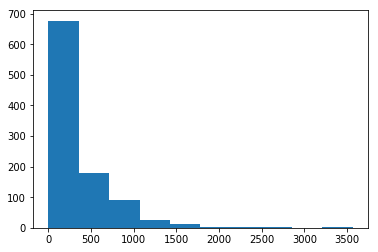

In [25]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    plt.show()
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


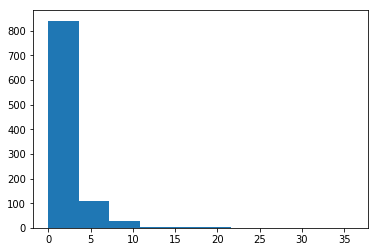

In [26]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())

## Number of Visits in First Week

**Do not Run the Cell Below As This Action Has Been Accomplished Above**

In [ ]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for account_key, engagement_for_student in engagement_by_account.items():
    for engagement_record in engagement_for_student:
        if engagement_record['num_courses_visited'] > 0:
            engagement_record['has_visited'] = 1
        else:
            engagement_record['has_visited'] = 0

**Run the Cell Below**

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


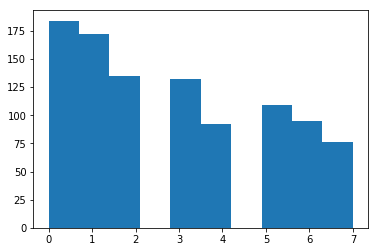

In [27]:
total_days_students_visited_classroom = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(total_days_students_visited_classroom.values())

## Splitting out Passing Students

In [81]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
    
subway_project_lesson_keys = ['746169184', '3176718735']
passing_assigned_ratings = ['PASSED', 'DISTINCTION']
passing_engagement = []
non_passing_engagement = []

submissions_by_account = group_data(paid_submissions, 'account_key')

for account_key, submissions_for_student in submissions_by_account.items():
    for submission in submissions_for_student:
        if submission['lesson_key'] in subway_project_lesson_keys\
        and submission['assigned_rating'] in passing_assigned_ratings:
            submission['passed_subway_project'] = 1
        else:
            submission['passed_subway_project'] = 0

passed_subway_project_by_account = sum_grouped_items(submissions_by_account, 'passed_subway_project')

for account_key, engagement_for_student in engagement_by_account.items():
    for engagement_record in engagement_for_student:
        if engagement_record['account_key'] in passed_subway_project_by_account:
            if passed_subway_project_by_account[account_key] > 0:
                passing_engagement.append(engagement_record)
            else:
                non_passing_engagement.append(engagement_record)
        else:
            non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [28]:
#Alternative Way Presented in Course

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
        (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

647

In [29]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

Total Minutes

For Passing Engagement:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


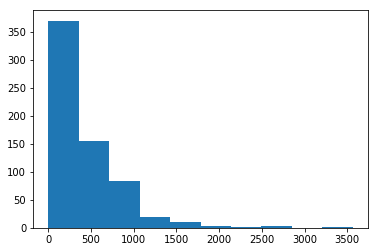


For Non-Passing Engagement:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


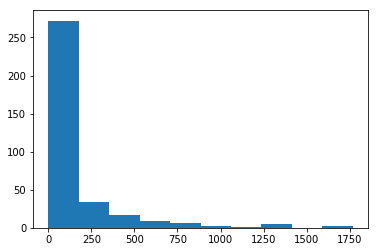



Total Lessons Completed:

For Passing Engagement
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


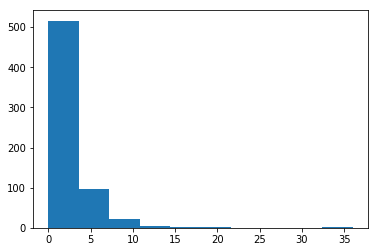


For Non-Passing Engagement:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


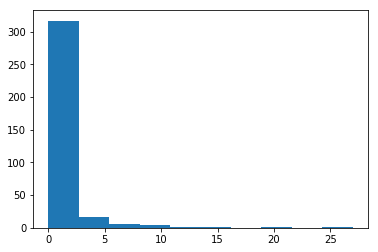



Total Days Visited

For Passing Engagement:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


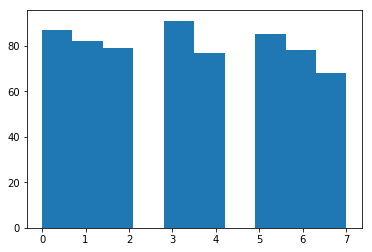


For Non-Passing Engagement:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


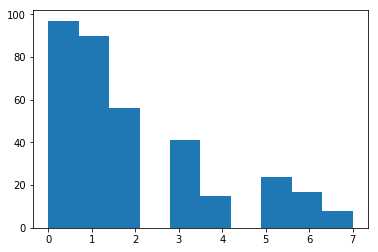

In [30]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_by_account_p = group_data(passing_engagement, 'account_key')
engagement_by_account_np = group_data(non_passing_engagement, 'account_key')

#Total Minutes
total_minutes_by_account_p = sum_grouped_items(engagement_by_account_p, 'total_minutes_visited')
total_minutes_p = total_minutes_by_account_p.values()
total_minutes_by_account_np = sum_grouped_items(engagement_by_account_np, 'total_minutes_visited')
total_minutes_np = total_minutes_by_account_np.values()

print 'Total Minutes'
print '\nFor Passing Engagement:'
describe_data(total_minutes_p)
print '\nFor Non-Passing Engagement:'
describe_data(total_minutes_np)

#Total Lessons Completed
lessons_completed_by_account_p = sum_grouped_items(engagement_by_account_p, 'lessons_completed')
total_lessons_p = lessons_completed_by_account_p.values()
lessons_completed_by_account_np = sum_grouped_items(engagement_by_account_np, 'lessons_completed')
total_lessons_np = lessons_completed_by_account_np.values()

print '\n\nTotal Lessons Completed:'
print '\nFor Passing Engagement'
describe_data(total_lessons_p)
print '\nFor Non-Passing Engagement:'
describe_data(total_lessons_np)

#Total Day Visited
days_visited_by_account_p = sum_grouped_items(engagement_by_account_p, 'has_visited')
total_days_visited_p = days_visited_by_account_p.values()
days_visited_by_account_np = sum_grouped_items(engagement_by_account_np, 'has_visited')
total_days_visited_np = days_visited_by_account_np.values()

print '\n\nTotal Days Visited'
print '\nFor Passing Engagement:'
describe_data(total_days_visited_p)
print '\nFor Non-Passing Engagement:'
describe_data(total_days_visited_np)

## Making Histograms

Total Minutes

For Passing Engagement:


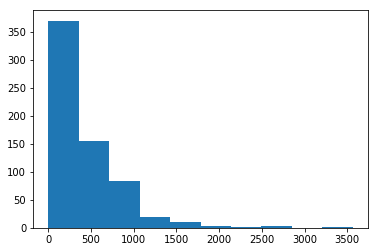


For Non-Passing Engagement:


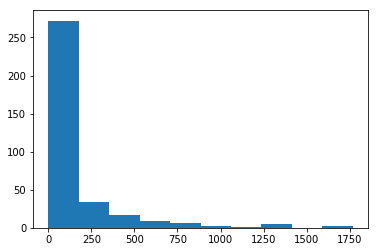



Total Lessons Completed:

For Passing Engagement


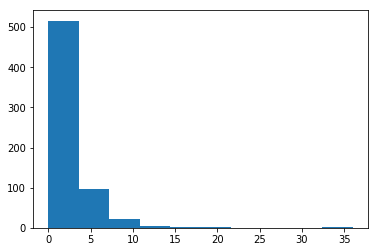


For Non-Passing Engagement:


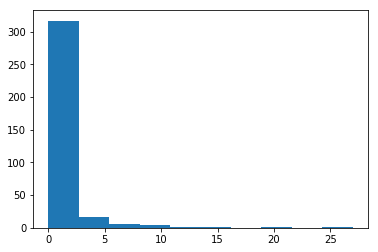



Total Days Visited

For Passing Engagement:


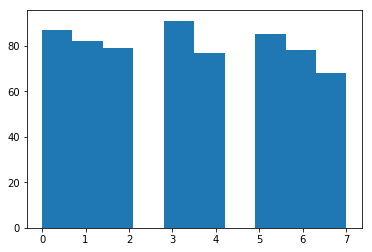


For Non-Passing Engagement:


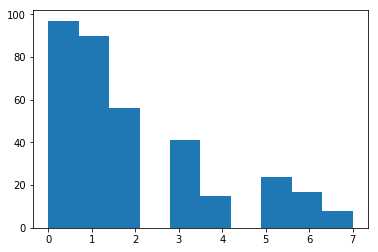

In [31]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

#Total Minutes
print 'Total Minutes'
print '\nFor Passing Engagement:'
plt.hist(total_minutes_p)
plt.show()
print '\nFor Non-Passing Engagement:'
plt.hist(total_minutes_np)
plt.show()

#Total Lessons Completed
print '\n\nTotal Lessons Completed:'
print '\nFor Passing Engagement'
plt.hist(total_lessons_p)
plt.show()
print '\nFor Non-Passing Engagement:'
plt.hist(total_lessons_np)
plt.show()

#Total Day Visited
print '\n\nTotal Days Visited'
print '\nFor Passing Engagement:'
plt.hist(total_days_visited_p)
plt.show()
print '\nFor Non-Passing Engagement:'
plt.hist(total_days_visited_np)
plt.show()

## Improving Plots and Sharing Findings

Total Minutes

For Passing Engagement:


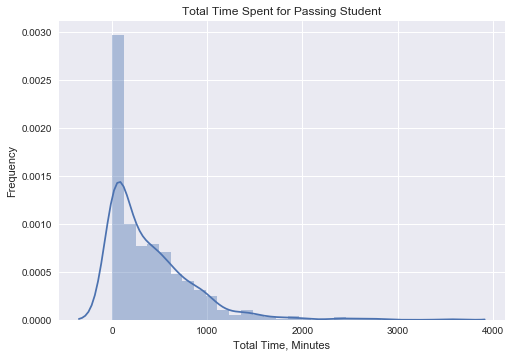


For Non-Passing Engagement:


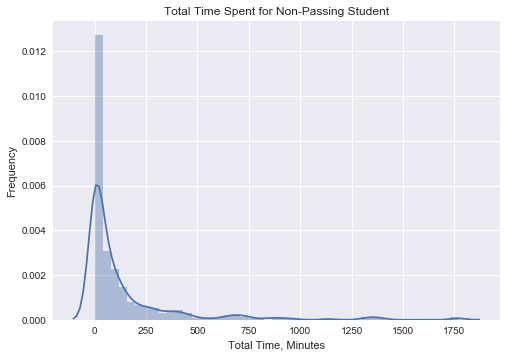



Total Lessons Completed:

For Passing Engagement


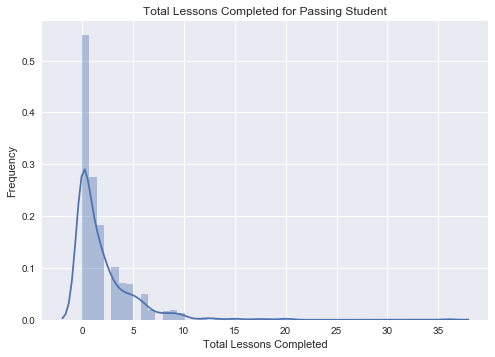


For Non-Passing Engagement:


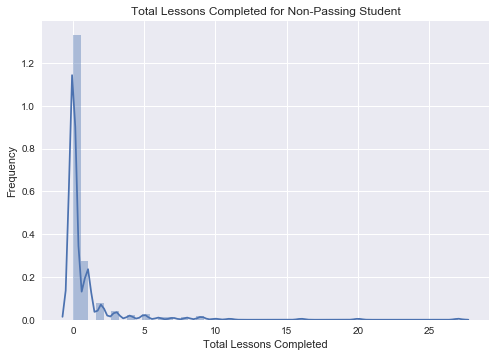



Total Days Visited

For Passing Engagement:


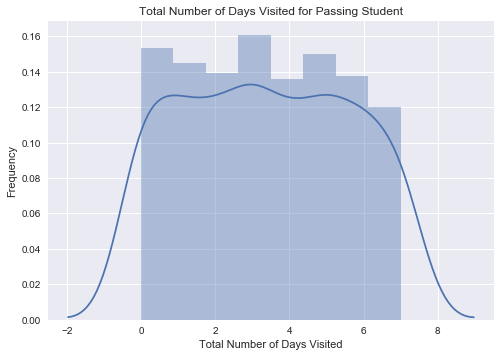


For Non-Passing Engagement:


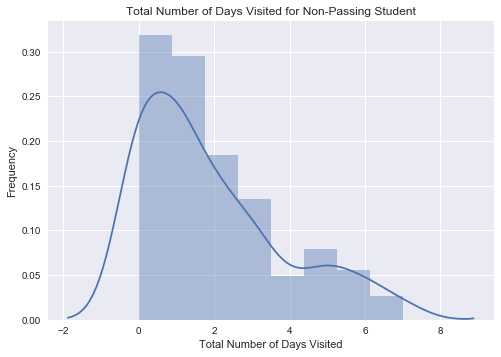

In [32]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

#Total Minutes
print 'Total Minutes'

print '\nFor Passing Engagement:'
sns.distplot(total_minutes_p)
sns.plt.title("Total Time Spent for Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Time, Minutes")
sns.plt.show()

print '\nFor Non-Passing Engagement:'
sns.distplot(total_minutes_np)
sns.plt.title("Total Time Spent for Non-Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Time, Minutes")
sns.plt.show()

#Total Lessons Completed
print '\n\nTotal Lessons Completed:'

print '\nFor Passing Engagement'
sns.distplot(total_lessons_p)
sns.plt.title("Total Lessons Completed for Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Lessons Completed")
sns.plt.show()

print '\nFor Non-Passing Engagement:'
sns.distplot(total_lessons_np)
sns.plt.title("Total Lessons Completed for Non-Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Lessons Completed")
sns.plt.show()

#Total Day Visited
print '\n\nTotal Days Visited'

print '\nFor Passing Engagement:'
sns.distplot(total_days_visited_p, bins=8)
sns.plt.title("Total Number of Days Visited for Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Number of Days Visited")
sns.plt.show()

print '\nFor Non-Passing Engagement:'
sns.distplot(total_days_visited_np, bins=8)
sns.plt.title("Total Number of Days Visited for Non-Passing Student")
sns.plt.ylabel("Frequency")
sns.plt.xlabel("Total Number of Days Visited")
sns.plt.show()